In [39]:
import pandas as pd
import numpy as np
import polars as pl
pd.options.display.max_columns=123

In [40]:
fulldata = pd.read_csv("actions_last_3_years.csv",encoding= 'unicode_escape')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3203: DtypeWarning: Columns (4,33,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [41]:
halfdata = fulldata[(fulldata["period"]==1)]

In [42]:
halfdata = halfdata.drop(["Years","leagueId","clock","shotClock","timeActual", "shirtNumber","x","y",
                         "x2","y2","area","side","linkDetail","linkDetailLeague","linkDetailMatch",
                          "leagueName","matchExternalId","teamName","teamExternalId","linkDetailTeam",
                          "personExternalId","firstName","familyName","TVName","scoreboardName",
                          "nickName","internationalFirstName","internationalFamilyName","linkDetailPerson","value",
                         "officialId","previousAction","qualifiers","periodType","actionNumber"],
                        axis=1)

In [43]:
halfdata = halfdata[halfdata["actionType"]!="clock"]
halfdata = halfdata[halfdata["actionType"]!="game"]
halfdata = halfdata[halfdata["subType"]!="startperiod"]
halfdata = halfdata[halfdata["actionType"]!="timeout"]
halfdata = halfdata[halfdata["actionType"]!="substitution"]

In [44]:
halfdata[['Team1Player1', 'Team1Player2',"Team1Player3","Team1Player4","Team1Player5"]] = halfdata.playersTeam1.str.split(";", expand = True).drop([5]
                                                                                                                                                  ,axis=1)
halfdata[['Team2Player1', 'Team2Player2',"Team2Player3","Team2Player4","Team2Player5"]] = halfdata.playersTeam1.str.split(";", expand = True).drop([5]
                                                                                                                                                  ,axis=1)

In [45]:
halfdata[['Team1Player1', 'Team1Player2',"Team1Player3","Team1Player4","Team1Player5"]] = halfdata[['Team1Player1', 'Team1Player2',"Team1Player3","Team1Player4","Team1Player5"]].astype(float)
halfdata[['Team2Player1', 'Team2Player2',"Team2Player3","Team2Player4","Team2Player5"]] = halfdata[['Team2Player1', 'Team2Player2',"Team2Player3","Team2Player4","Team2Player5"]].astype(float)

In [46]:
halfdata = halfdata.drop(["playersTeam1","playersTeam2"],axis=1)

In [47]:
halfdata.head()

,matchId,period,teamId,personId,actionType,subType,success,score1,score2,Team1Player1,Team1Player2,Team1Player3,Team1Player4,Team1Player5,Team2Player1,Team2Player2,Team2Player3,Team2Player4,Team2Player5
1,947443,1,NaN,NaN,period,start,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
4,947443,1,101345.0,729310.0,jumpball,won,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
5,947443,1,101343.0,960500.0,jumpball,lost,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
6,947443,1,101345.0,734447.0,3pt,jumpshot,NaN,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
8,947443,1,101343.0,NaN,rebound,defensive,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0


In [48]:
halfdata

,matchId,period,teamId,personId,actionType,subType,success,score1,score2,Team1Player1,Team1Player2,Team1Player3,Team1Player4,Team1Player5,Team2Player1,Team2Player2,Team2Player3,Team2Player4,Team2Player5
1,947443,1,NaN,NaN,period,start,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
4,947443,1,101345.0,729310.0,jumpball,won,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
5,947443,1,101343.0,960500.0,jumpball,lost,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
6,947443,1,101345.0,734447.0,3pt,jumpshot,NaN,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
8,947443,1,101343.0,NaN,rebound,defensive,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461491,1885202,1,133706.0,1319436.0,2pt,jumpshot,1.0,25,21,1622336.0,1574397.0,1579161.0,1319702.0,1574391.0,1622336.0,1574397.0,1579161.0,1319702.0,1574391.0
461493,1885202,1,133701.0,1574397.0,3pt,jumpshot,NaN,25,21,1622336.0,1574397.0,1579161.0,1319702.0,1574391.0,1622336.0,1574397.0,1579161.0,1319702.0,1574391.0
461494,1885202,1,133706.0,1319428.0,rebound,defensive,1.0,25,21,1622336.0,1574397.0,1579161.0,1319702.0,1574391.0,1622336.0,1574397.0,1579161.0,1319702.0,1574391.0
461496,1885202,1,133706.0,1319428.0,3pt,jumpshot,NaN,25,21,1622336.0,1574397.0,1579161.0,1319702.0,1574391.0,1622336.0,1574397.0,1579161.0,1319702.0,1574391.0


In [49]:
uniquematchId = halfdata["matchId"].unique()

In [50]:
halfdata[halfdata["matchId"]==947443]

,matchId,period,teamId,personId,actionType,subType,success,score1,score2,Team1Player1,Team1Player2,Team1Player3,Team1Player4,Team1Player5,Team2Player1,Team2Player2,Team2Player3,Team2Player4,Team2Player5
1,947443,1,NaN,NaN,period,start,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
4,947443,1,101345.0,729310.0,jumpball,won,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
5,947443,1,101343.0,960500.0,jumpball,lost,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
6,947443,1,101345.0,734447.0,3pt,jumpshot,NaN,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
8,947443,1,101343.0,NaN,rebound,defensive,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,947443,1,101345.0,729310.0,block,NaN,1.0,15,14,917343.0,729310.0,734447.0,729405.0,729478.0,917343.0,729310.0,734447.0,729405.0,729478.0
140,947443,1,101345.0,917343.0,rebound,defensive,1.0,15,14,917343.0,729310.0,734447.0,729405.0,729478.0,917343.0,729310.0,734447.0,729405.0,729478.0
141,947443,1,101345.0,917343.0,3pt,jumpshot,1.0,18,14,917343.0,729310.0,734447.0,729405.0,729478.0,917343.0,729310.0,734447.0,729405.0,729478.0
145,947443,1,101343.0,960502.0,2pt,jumpshot,1.0,18,16,917343.0,729310.0,734447.0,729405.0,729478.0,917343.0,729310.0,734447.0,729405.0,729478.0


df = pd.DataFrame(columns=['A','B','C','D','E','F','G'])

In [51]:
halfdata["actionType"].unique()

array(['period', 'jumpball', '3pt', 'rebound', '2pt', 'assist',
       'turnover', 'steal', 'block', 'foul', 'foulon', 'freethrow'],
      dtype=object)

In [52]:
halfdata[halfdata["actionType"]=="freethrow"]["subType"].unique()

array(['1of2', '2of2', '1of1', '1of3', '2of3', '3of3'], dtype=object)

In [53]:
halfdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66914 entries, 1 to 461498
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   matchId       66914 non-null  int64  
 1   period        66914 non-null  int64  
 2   teamId        65510 non-null  float64
 3   personId      64100 non-null  float64
 4   actionType    66914 non-null  object 
 5   subType       51463 non-null  object 
 6   success       54119 non-null  float64
 7   score1        66914 non-null  int64  
 8   score2        66914 non-null  int64  
 9   Team1Player1  66914 non-null  float64
 10  Team1Player2  66914 non-null  float64
 11  Team1Player3  66914 non-null  float64
 12  Team1Player4  66914 non-null  float64
 13  Team1Player5  66914 non-null  float64
 14  Team2Player1  66914 non-null  float64
 15  Team2Player2  66914 non-null  float64
 16  Team2Player3  66914 non-null  float64
 17  Team2Player4  66914 non-null  float64
 18  Team2Player5  66914 non-n

In [54]:
predictiondata = pd.DataFrame(columns=['matchId','Team1','Team2','Score1','Score2','T1-3PFail',
                                       "T1-3PSuccess","T1-2PFail","T1-2PSuccess",
                                       'T1-OffReb',"T1-DefReb","T1-Turnover",
                                       "T1-TurnoverBC","T1-Steal","T1-Block","T1-Foul","T1-Foulon",
                                      "T1-FT",'T2-3PFail',"T2-3PSuccess",
                                       "T2-2PFail","T2-2PSuccess",
                                       'T2-OffReb',"T2-DefReb","T2-Turnover",
                                       "T2-TurnoverBC","T2-Steal","T2-Block","T2-Foul","T2-Foulon",
                                      "T2-FT"],index=range(675))

In [55]:
predictiondata

,matchId,Team1,Team2,Score1,Score2,T1-3PFail,T1-3PSuccess,T1-2PFail,T1-2PSuccess,T1-OffReb,T1-DefReb,T1-Turnover,T1-TurnoverBC,T1-Steal,T1-Block,T1-Foul,T1-Foulon,T1-FT,T2-3PFail,T2-3PSuccess,T2-2PFail,T2-2PSuccess,T2-OffReb,T2-DefReb,T2-Turnover,T2-TurnoverBC,T2-Steal,T2-Block,T2-Foul,T2-Foulon,T2-FT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
predictiondata['Team2'].unique()

array([nan], dtype=object)

In [57]:
len(halfdata['matchId'].unique())

675

In [58]:
halfdata.head()

,matchId,period,teamId,personId,actionType,subType,success,score1,score2,Team1Player1,Team1Player2,Team1Player3,Team1Player4,Team1Player5,Team2Player1,Team2Player2,Team2Player3,Team2Player4,Team2Player5
1,947443,1,NaN,NaN,period,start,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
4,947443,1,101345.0,729310.0,jumpball,won,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
5,947443,1,101343.0,960500.0,jumpball,lost,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
6,947443,1,101345.0,734447.0,3pt,jumpshot,NaN,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0
8,947443,1,101343.0,NaN,rebound,defensive,1.0,0,0,734448.0,734446.0,917343.0,729310.0,734447.0,734448.0,734446.0,917343.0,729310.0,734447.0


In [86]:
i = 0
for mId in uniquematchId:
    predictiondata.loc[i].matchId = mId
    
    firstvalidindex = pd.Series(halfdata[halfdata["matchId"]==mId]["teamId"].unique()).first_valid_index()
    teamId1 = halfdata[halfdata["matchId"]==mId]["teamId"].unique()[firstvalidindex]
    lastvalidindex = pd.Series(halfdata[halfdata["matchId"]==mId]["teamId"].unique()).last_valid_index()
    teamId2 = halfdata[halfdata["matchId"]==mId]["teamId"].unique()[lastvalidindex]
    
    player = halfdata[(halfdata["matchId"]==mId)]["personId"].dropna().unique()[0]
    if player in halfdata[halfdata["matchId"]==mId][["Team1Player1","Team1Player2","Team1Player3","Team1Player4",
                                                         "Team1Player5"]].values:
            predictiondata.loc[i].Team1 = halfdata[(halfdata["matchId"]==mId) & (halfdata["personId"]==player)]["teamId"].values[1]
            if halfdata[(halfdata["matchId"]==mId) & (halfdata["personId"]==player)]["teamId"].values[1] == teamId1:
                predictiondata.loc[i].Team2 = teamId2
            else: predictiondata.loc[i].Team2 = teamId1
                
    else:  
        predictiondata.loc[i].Team2 = halfdata[(halfdata["matchId"]==mId) & (halfdata["personId"]==player)]["teamId"].values[1]
        if halfdata[(halfdata["matchId"]==mId) & (halfdata["personId"]==player)]["teamId"].values[1] == teamId1:
                predictiondata.loc[i].Team1 = teamId2
        else: predictiondata.loc[i].Team1 = teamId1
    i += 1

AttributeError: 'DataFrame' object has no attribute 'loc'

In [60]:
for i in range(675):
    matchID = predictiondata.loc[i]["matchId"]
    Team1 = predictiondata.loc[i]["Team1"]
    Team2 = predictiondata.loc[i]["Team2"]
    
    predictiondata.loc[i]["Score1"] = halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="period") & (halfdata["subType"]=="end") & (halfdata["period"]==1)]["score1"].iloc[0]
    predictiondata.loc[i]["Score2"] = halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="period") & (halfdata["subType"]=="end") & (halfdata["period"]==1)]["score2"].iloc[0]
    
    predictiondata.loc[i]["T1-3PFail"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["success"].isna()) & (halfdata["actionType"]=="3pt") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-2PFail"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["success"].isna()) & (halfdata["actionType"]=="2pt") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-3PSuccess"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["success"]==1) & (halfdata["actionType"]=="3pt") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-2PSuccess"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["success"]==1) & (halfdata["actionType"]=="2pt") & (halfdata["teamId"]==Team1)])
    
    
    predictiondata.loc[i]["T1-OffReb"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="rebound") & (halfdata["subType"]=="offensive") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-DefReb"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="rebound") & (halfdata["subType"]=="defensive") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-Turnover"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="turnover") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-TurnoverBC"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="turnover") & (halfdata["subType"]=="backcourt") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-Steal"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="steal") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-Block"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="block") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-Foul"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="foul") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-Foulon"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="foulon") & (halfdata["teamId"]==Team1)])
    predictiondata.loc[i]["T1-FT"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="freethrow") & (halfdata["teamId"]==Team1)])
    
    predictiondata.loc[i]["T2-3PFail"] = len(halfdata[(halfdata["matchId"]==matchID)& (halfdata["success"].isna()) & (halfdata["actionType"]=="3pt") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-2PFail"] = len(halfdata[(halfdata["matchId"]==matchID)& (halfdata["success"].isna()) & (halfdata["actionType"]=="2pt") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-3PSuccess"] = len(halfdata[(halfdata["matchId"]==matchID)& (halfdata["success"]==1) & (halfdata["actionType"]=="3pt") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-2PSuccess"] = len(halfdata[(halfdata["matchId"]==matchID)& (halfdata["success"]==1) & (halfdata["actionType"]=="2pt") & (halfdata["teamId"]==Team2)])
    
    predictiondata.loc[i]["T2-OffReb"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="rebound") & (halfdata["subType"]=="offensive") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-DefReb"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="rebound") & (halfdata["subType"]=="defensive") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-Turnover"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="turnover") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-TurnoverBC"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="turnover") & (halfdata["subType"]=="backcourt") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-Steal"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="steal") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-Block"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="block") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-Foul"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="foul") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-Foulon"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="foulon") & (halfdata["teamId"]==Team2)])
    predictiondata.loc[i]["T2-FT"] = len(halfdata[(halfdata["matchId"]==matchID) & (halfdata["actionType"]=="freethrow") & (halfdata["teamId"]==Team2)])
    
    

In [110]:
predictiondatapl['Score1'][i]

18

In [61]:
fulldata = fulldata.drop(["Years","leagueId","clock","shotClock","timeActual", "shirtNumber","x","y",
                         "x2","y2","area","side","linkDetail","linkDetailLeague","linkDetailMatch",
                          "leagueName","matchExternalId","teamName","teamExternalId","linkDetailTeam",
                          "personExternalId","firstName","familyName","TVName","scoreboardName",
                          "nickName","internationalFirstName","internationalFamilyName","linkDetailPerson","value",
                         "officialId","previousAction","qualifiers","periodType","actionNumber"],
                        axis=1)

In [62]:
fulldata = fulldata[fulldata["actionType"]!="clock"]
fulldata = fulldata[fulldata["actionType"]!="game"]
fulldata = fulldata[fulldata["subType"]!="startperiod"]
fulldata = fulldata[fulldata["actionType"]!="timeout"]
fulldata = fulldata[fulldata["actionType"]!="substitution"]

In [87]:
fulldata[fulldata["matchId"]==947443]

,matchId,period,teamId,personId,actionType,subType,success,playersTeam1,playersTeam2,score1,score2
1,947443,1,NaN,NaN,period,start,1.0,734448;734446;917343;729310;734447;,729382;960500;960501;729419;729397;,0,0
4,947443,1,101345.0,729310.0,jumpball,won,1.0,734448;734446;917343;729310;734447;,729382;960500;960501;729419;729397;,0,0
5,947443,1,101343.0,960500.0,jumpball,lost,1.0,734448;734446;917343;729310;734447;,729382;960500;960501;729419;729397;,0,0
6,947443,1,101345.0,734447.0,3pt,jumpshot,NaN,734448;734446;917343;729310;734447;,729382;960500;960501;729419;729397;,0,0
8,947443,1,101343.0,NaN,rebound,defensive,1.0,734448;734446;917343;729310;734447;,729382;960500;960501;729419;729397;,0,0
...,...,...,...,...,...,...,...,...,...,...,...
657,947443,4,101343.0,729458.0,rebound,defensive,1.0,917343;734446;734448;729478;729405;,960500;729419;960503;960501;729458;,78,69
659,947443,4,101345.0,734446.0,foul,technical,1.0,917343;734446;734448;729478;729405;,960500;729419;960503;960501;729458;,78,69
660,947443,4,101343.0,960500.0,freethrow,1of1,1.0,917343;734446;734448;729478;729405;,960500;729419;960503;960501;729458;,78,70
663,947443,4,101343.0,729419.0,3pt,jumpshot,1.0,917343;734446;734448;729478;729405;,960500;729419;960503;960501;729458;,78,73


In [64]:
predictiondata["fhWinner"] = 1
#predictiondata["More Offensive Rebounds"] = 1
predictiondata["More Three Points end of q3"] = 1

#predictiondata["More Steals"] = 1
predictiondata["More 2pt success"] = 1

In [65]:
predictiondata

,matchId,Team1,Team2,Score1,Score2,T1-3PFail,T1-3PSuccess,T1-2PFail,T1-2PSuccess,T1-OffReb,T1-DefReb,T1-Turnover,T1-TurnoverBC,T1-Steal,T1-Block,T1-Foul,T1-Foulon,T1-FT,T2-3PFail,T2-3PSuccess,T2-2PFail,T2-2PSuccess,T2-OffReb,T2-DefReb,T2-Turnover,T2-TurnoverBC,T2-Steal,T2-Block,T2-Foul,T2-Foulon,T2-FT,fhWinner,More Three Points end of q3,More 2pt success
0,947443,101345,101343,18,16,4,2,3,4,4,6,5,0,2,1,4,3,4,0,2,6,4,0,3,3,0,1,1,3,4,2,1,1,1
1,947445,101350,101353,10,8,4,0,10,5,5,8,3,0,5,1,6,2,0,4,1,5,2,3,8,7,0,0,2,2,6,4,1,1,1
2,947558,101342,101340,17,17,4,2,7,5,5,9,5,0,2,0,5,4,2,5,1,6,4,2,6,2,0,4,1,4,5,7,1,1,1
3,947559,101344,101347,12,19,6,1,5,4,3,8,4,0,0,0,5,3,1,2,3,6,4,1,7,0,0,2,0,3,5,4,1,1,1
4,947560,101346,101339,13,24,5,1,9,5,3,7,3,0,1,1,3,2,0,3,1,6,9,2,10,1,0,2,1,2,3,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,1883373,133680,133701,18,14,6,3,3,4,4,8,3,0,2,0,5,4,2,4,2,6,3,1,5,3,0,1,1,4,5,2,1,1,1
671,1884422,133680,133701,20,18,2,2,4,6,0,7,3,0,1,0,5,4,3,6,1,3,4,2,6,3,0,2,0,4,5,7,1,1,1
672,1885200,133706,133701,21,21,6,4,3,3,4,6,3,0,1,0,2,3,3,4,2,3,6,1,5,1,0,3,0,3,2,3,1,1,1
673,1885201,133706,133701,23,19,4,4,8,4,4,7,2,0,0,1,7,4,3,4,0,5,4,2,8,2,0,2,1,4,6,11,1,1,1


In [66]:
a = fulldata[(fulldata["matchId"]==matchID)  & (fulldata["period"]== 3) & (fulldata["teamId"]==Team1)].tail(1)['score1'].tolist()
b = fulldata[(fulldata["matchId"]==matchID)  & (fulldata["period"]== 3) & (fulldata["teamId"]==Team2)].tail(1)['score2'].tolist()
#fulldata[(fulldata["matchId"]==matchID)  & (fulldata["period"]== 3)]

if(a>b):
    print(a)

In [67]:
len(fulldata[(fulldata["matchId"]==matchID)  & (fulldata["actionType"]== '3pt') & (fulldata["period"] != 4) & (fulldata["teamId"]==Team1)])

17

In [68]:
len(fulldata[(fulldata["matchId"]==matchID)  & (fulldata["actionType"]== '3pt') & (fulldata["period"] != 4) & (fulldata["teamId"]==Team2)])

23

In [69]:
for i in range(675):
    matchID = predictiondata.loc[i]["matchId"]
    Team1 = predictiondata.loc[i]["Team1"]
    Team2 = predictiondata.loc[i]["Team2"]
    # Who leads the game at the end of the first half
    finalscore1 = fulldata[(fulldata["matchId"]==matchID)  & (fulldata["period"]== 2)].tail(1)["score1"].iloc[0]
    finalscore2 = fulldata[(fulldata["matchId"]==matchID)  & (fulldata["period"]== 2)].tail(1)["score2"].iloc[0]

    # Which team has more three-point trials at the end of the third quarter
    morethreepointsteam1 = len(fulldata[(fulldata["matchId"]==matchID)  & (fulldata["actionType"] == '3pt') & (fulldata["period"] != 4) & (fulldata["teamId"]==Team1)])
    morethreepointsteam2 = len(fulldata[(fulldata["matchId"]==matchID)  & (fulldata["actionType"] == '3pt') & (fulldata["period"] != 4) & (fulldata["teamId"]==Team2)])

    #morethreepointsteam1 = fulldata[(fulldata["matchId"]==matchID)  & (fulldata["period"]== 3) & (fulldata["teamId"]==Team1)].tail(1)['score1'].tolist()
    #morethreepointsteam2 = fulldata[(fulldata["matchId"]==matchID)  & (fulldata["period"]== 3) & (fulldata["teamId"]==Team2)].tail(1)['score2'].tolist()
    
    # Which team has more two-point success percentage
    more2ptsucteam1 = (len(fulldata[(fulldata["matchId"]==matchID) & (fulldata["actionType"]=="2pt") & (fulldata["success"]==1) & (fulldata["teamId"]==Team1)]) / len(fulldata[(fulldata["matchId"]==matchID) & (fulldata["actionType"]=="2pt") & (fulldata["teamId"]==Team1)])) * 100
    more2ptsucteam2 = (len(fulldata[(fulldata["matchId"]==matchID) & (fulldata["actionType"]=="2pt") & (fulldata["success"]==1) & (fulldata["teamId"]==Team2)]) / len(fulldata[(fulldata["matchId"]==matchID) & (fulldata["actionType"]=="2pt") & (fulldata["teamId"]==Team2)])) * 100
    
    if (finalscore1 > finalscore2):                 
        predictiondata["fhWinner"].loc[i] = "Team-1"
    if (finalscore1 < finalscore2):
        predictiondata["fhWinner"].loc[i] = "Team-2"
    if (finalscore1 == finalscore2):                   
        predictiondata["fhWinner"].loc[i] = "Draw"

    if ( morethreepointsteam1 > morethreepointsteam2 ):
        predictiondata["More Three Points end of q3"].loc[i] = "Team-1"
    if ( morethreepointsteam1 < morethreepointsteam2):
        predictiondata["More Three Points end of q3"].loc[i] = "Team-2"
    if ( morethreepointsteam1 == morethreepointsteam2):
        predictiondata["More Three Points end of q3"].loc[i] = "Draw"
    
    if (more2ptsucteam1 > more2ptsucteam2):
        predictiondata["More 2pt success"].loc[i] = "Team-1"
    if (more2ptsucteam1 < more2ptsucteam2):
        predictiondata["More 2pt success"].loc[i] = "Team-2"
    if (more2ptsucteam1 == more2ptsucteam2):
        predictiondata["More 2pt success"].loc[i] = "Draw"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
predictiondata

In [78]:
#predictiondata.to_excel(r'/Users/alper/Desktop/METU/5th Year 1st Semester/STAT493/STAT493FinalProject/kk.xlsx')

In [88]:
predictiondatapl = pl.read_excel("kk.xlsx")

In [34]:
from collections import Counter


print(Counter(predictiondata["More 2pt success"]).keys())
print(Counter(predictiondata["More 2pt success"]).values())

dict_keys(['Team-1', 'Team-2', 'Draw'])
dict_values([348, 321, 6])


In [41]:
print(Counter(predictiondata["More Three Points end of q3"]).keys())
print(Counter(predictiondata["More Three Points end of q3"]).values())

dict_keys(['Team-1', 'Team-2', 'Draw'])
dict_values([365, 264, 46])


In [42]:
print(Counter(predictiondata["fhWinner"]).keys())
print(Counter(predictiondata["fhWinner"]).values())

dict_keys(['Team-1', 'Team-2', 'Draw'])
dict_values([362, 287, 26])


In [43]:
fulldata[(fulldata['matchId'] == 947443) & (fulldata['period'] == 1)]

,matchId,period,teamId,personId,actionType,subType,success,playersTeam1,playersTeam2,score1,score2
1,947443,1,NaN,NaN,period,start,1.0,734448;734446;917343;729310;734447;,729382;960500;960501;729419;729397;,0,0
4,947443,1,101345.0,729310.0,jumpball,won,1.0,734448;734446;917343;729310;734447;,729382;960500;960501;729419;729397;,0,0
5,947443,1,101343.0,960500.0,jumpball,lost,1.0,734448;734446;917343;729310;734447;,729382;960500;960501;729419;729397;,0,0
6,947443,1,101345.0,734447.0,3pt,jumpshot,NaN,734448;734446;917343;729310;734447;,729382;960500;960501;729419;729397;,0,0
8,947443,1,101343.0,NaN,rebound,defensive,1.0,734448;734446;917343;729310;734447;,729382;960500;960501;729419;729397;,0,0
...,...,...,...,...,...,...,...,...,...,...,...
139,947443,1,101345.0,729310.0,block,NaN,1.0,917343;729310;734447;729405;729478;,960500;960501;960502;729469;960503;,15,14
140,947443,1,101345.0,917343.0,rebound,defensive,1.0,917343;729310;734447;729405;729478;,960500;960501;960502;729469;960503;,15,14
141,947443,1,101345.0,917343.0,3pt,jumpshot,1.0,917343;729310;734447;729405;729478;,960500;960501;960502;729469;960503;,18,14
145,947443,1,101343.0,960502.0,2pt,jumpshot,1.0,917343;729310;734447;729405;729478;,960500;960501;960502;729469;960503;,18,16


In [44]:
predictiondata

,matchId,Team1,Team2,Score1,Score2,T1-3PFail,T1-3PSuccess,T1-2PFail,T1-2PSuccess,T1-OffReb,T1-DefReb,T1-Turnover,T1-TurnoverBC,T1-Steal,T1-Block,T1-Foul,T1-Foulon,T1-FT,T2-3PFail,T2-3PSuccess,T2-2PFail,T2-2PSuccess,T2-OffReb,T2-DefReb,T2-Turnover,T2-TurnoverBC,T2-Steal,T2-Block,T2-Foul,T2-Foulon,T2-FT,fhWinner,More Three Points end of q3,More 2pt success
0,947443,101345,101343,18,16,4,2,3,4,4,6,5,0,2,1,4,3,4,0,2,6,4,0,3,3,0,1,1,3,4,2,Team-1,Team-1,Team-1
1,947445,101350,101353,10,8,4,0,10,5,5,8,3,0,5,1,6,2,0,4,1,5,2,3,8,7,0,0,2,2,6,4,Team-1,Team-2,Team-2
2,947558,101342,101340,17,17,4,2,7,5,5,9,5,0,2,0,5,4,2,5,1,6,4,2,6,2,0,4,1,4,5,7,Team-2,Team-1,Team-2
3,947559,101344,101347,12,19,6,1,5,4,3,8,4,0,0,0,5,3,1,2,3,6,4,1,7,0,0,2,0,3,5,4,Draw,Team-1,Team-2
4,947560,101346,101339,13,24,5,1,9,5,3,7,3,0,1,1,3,2,0,3,1,6,9,2,10,1,0,2,1,2,3,3,Team-2,Team-2,Team-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,1883373,133680,133701,18,14,6,3,3,4,4,8,3,0,2,0,5,4,2,4,2,6,3,1,5,3,0,1,1,4,5,2,Team-1,Team-1,Team-1
671,1884422,133680,133701,20,18,2,2,4,6,0,7,3,0,1,0,5,4,3,6,1,3,4,2,6,3,0,2,0,4,5,7,Team-2,Team-2,Team-2
672,1885200,133706,133701,21,21,6,4,3,3,4,6,3,0,1,0,2,3,3,4,2,3,6,1,5,1,0,3,0,3,2,3,Team-1,Team-1,Team-1
673,1885201,133706,133701,23,19,4,4,8,4,4,7,2,0,0,1,7,4,3,4,0,5,4,2,8,2,0,2,1,4,6,11,Team-1,Team-1,Team-1


In [45]:
predictiondata["FQScore"] = predictiondata["Score1"]-predictiondata["Score2"]
predictiondata["FQWinner"] = 1

In [46]:
for i in range(675):
    diff = predictiondata["FQScore"].loc[i]
    if diff < 0:
        predictiondata["FQWinner"].loc[i] = "Team-2"
    if diff > 0:
        predictiondata["FQWinner"].loc[i] = "Team-1"
    if diff == 0:
        predictiondata["FQWinner"].loc[i] = "Draw"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [47]:
predictiondata.head()

predictiondata.isna().sum()

matchId                        0
Team1                          0
Team2                          0
Score1                         0
Score2                         0
T1-3PFail                      0
T1-3PSuccess                   0
T1-2PFail                      0
T1-2PSuccess                   0
T1-OffReb                      0
T1-DefReb                      0
T1-Turnover                    0
T1-TurnoverBC                  0
T1-Steal                       0
T1-Block                       0
T1-Foul                        0
T1-Foulon                      0
T1-FT                          0
T2-3PFail                      0
T2-3PSuccess                   0
T2-2PFail                      0
T2-2PSuccess                   0
T2-OffReb                      0
T2-DefReb                      0
T2-Turnover                    0
T2-TurnoverBC                  0
T2-Steal                       0
T2-Block                       0
T2-Foul                        0
T2-Foulon                      0
T2-FT     

In [48]:
predictiondata

,matchId,Team1,Team2,Score1,Score2,T1-3PFail,T1-3PSuccess,T1-2PFail,T1-2PSuccess,T1-OffReb,T1-DefReb,T1-Turnover,T1-TurnoverBC,T1-Steal,T1-Block,T1-Foul,T1-Foulon,T1-FT,T2-3PFail,T2-3PSuccess,T2-2PFail,T2-2PSuccess,T2-OffReb,T2-DefReb,T2-Turnover,T2-TurnoverBC,T2-Steal,T2-Block,T2-Foul,T2-Foulon,T2-FT,fhWinner,More Three Points end of q3,More 2pt success,FQScore,FQWinner
0,947443,101345,101343,18,16,4,2,3,4,4,6,5,0,2,1,4,3,4,0,2,6,4,0,3,3,0,1,1,3,4,2,Team-1,Team-1,Team-1,2,Team-1
1,947445,101350,101353,10,8,4,0,10,5,5,8,3,0,5,1,6,2,0,4,1,5,2,3,8,7,0,0,2,2,6,4,Team-1,Team-2,Team-2,2,Team-1
2,947558,101342,101340,17,17,4,2,7,5,5,9,5,0,2,0,5,4,2,5,1,6,4,2,6,2,0,4,1,4,5,7,Team-2,Team-1,Team-2,0,Draw
3,947559,101344,101347,12,19,6,1,5,4,3,8,4,0,0,0,5,3,1,2,3,6,4,1,7,0,0,2,0,3,5,4,Draw,Team-1,Team-2,-7,Team-2
4,947560,101346,101339,13,24,5,1,9,5,3,7,3,0,1,1,3,2,0,3,1,6,9,2,10,1,0,2,1,2,3,3,Team-2,Team-2,Team-2,-11,Team-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,1883373,133680,133701,18,14,6,3,3,4,4,8,3,0,2,0,5,4,2,4,2,6,3,1,5,3,0,1,1,4,5,2,Team-1,Team-1,Team-1,4,Team-1
671,1884422,133680,133701,20,18,2,2,4,6,0,7,3,0,1,0,5,4,3,6,1,3,4,2,6,3,0,2,0,4,5,7,Team-2,Team-2,Team-2,2,Team-1
672,1885200,133706,133701,21,21,6,4,3,3,4,6,3,0,1,0,2,3,3,4,2,3,6,1,5,1,0,3,0,3,2,3,Team-1,Team-1,Team-1,0,Draw
673,1885201,133706,133701,23,19,4,4,8,4,4,7,2,0,0,1,7,4,3,4,0,5,4,2,8,2,0,2,1,4,6,11,Team-1,Team-1,Team-1,4,Team-1


In [49]:
predictiondata2 = predictiondata

In [50]:
from xgboost import XGBClassifier
import optuna
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn

In [51]:
predictiondata2 = predictiondata2.drop(["matchId","Team1","Team2"],axis=1)

In [52]:
predictiondata2.head()

,Score1,Score2,T1-3PFail,T1-3PSuccess,T1-2PFail,T1-2PSuccess,T1-OffReb,T1-DefReb,T1-Turnover,T1-TurnoverBC,T1-Steal,T1-Block,T1-Foul,T1-Foulon,T1-FT,T2-3PFail,T2-3PSuccess,T2-2PFail,T2-2PSuccess,T2-OffReb,T2-DefReb,T2-Turnover,T2-TurnoverBC,T2-Steal,T2-Block,T2-Foul,T2-Foulon,T2-FT,fhWinner,More Three Points end of q3,More 2pt success,FQScore,FQWinner
0,18,16,4,2,3,4,4,6,5,0,2,1,4,3,4,0,2,6,4,0,3,3,0,1,1,3,4,2,Team-1,Team-1,Team-1,2,Team-1
1,10,8,4,0,10,5,5,8,3,0,5,1,6,2,0,4,1,5,2,3,8,7,0,0,2,2,6,4,Team-1,Team-2,Team-2,2,Team-1
2,17,17,4,2,7,5,5,9,5,0,2,0,5,4,2,5,1,6,4,2,6,2,0,4,1,4,5,7,Team-2,Team-1,Team-2,0,Draw
3,12,19,6,1,5,4,3,8,4,0,0,0,5,3,1,2,3,6,4,1,7,0,0,2,0,3,5,4,Draw,Team-1,Team-2,-7,Team-2
4,13,24,5,1,9,5,3,7,3,0,1,1,3,2,0,3,1,6,9,2,10,1,0,2,1,2,3,3,Team-2,Team-2,Team-2,-11,Team-2


In [53]:
encoder = LabelEncoder()

In [54]:
predictiondata2["fhWinner"] = encoder.fit_transform(predictiondata["fhWinner"])

In [55]:
predictiondata2["More Three Points end of q3"] = encoder.fit_transform(predictiondata2["More Three Points end of q3"])

In [56]:
predictiondata2["More 2pt success"] = encoder.fit_transform(predictiondata2["More 2pt success"])

In [57]:
predictiondata2["FQWinner"] = encoder.fit_transform(predictiondata2["FQWinner"])


In [58]:
predictiondata2.head()

,Score1,Score2,T1-3PFail,T1-3PSuccess,T1-2PFail,T1-2PSuccess,T1-OffReb,T1-DefReb,T1-Turnover,T1-TurnoverBC,T1-Steal,T1-Block,T1-Foul,T1-Foulon,T1-FT,T2-3PFail,T2-3PSuccess,T2-2PFail,T2-2PSuccess,T2-OffReb,T2-DefReb,T2-Turnover,T2-TurnoverBC,T2-Steal,T2-Block,T2-Foul,T2-Foulon,T2-FT,fhWinner,More Three Points end of q3,More 2pt success,FQScore,FQWinner
0,18,16,4,2,3,4,4,6,5,0,2,1,4,3,4,0,2,6,4,0,3,3,0,1,1,3,4,2,1,1,1,2,1
1,10,8,4,0,10,5,5,8,3,0,5,1,6,2,0,4,1,5,2,3,8,7,0,0,2,2,6,4,1,2,2,2,1
2,17,17,4,2,7,5,5,9,5,0,2,0,5,4,2,5,1,6,4,2,6,2,0,4,1,4,5,7,2,1,2,0,0
3,12,19,6,1,5,4,3,8,4,0,0,0,5,3,1,2,3,6,4,1,7,0,0,2,0,3,5,4,0,1,2,-7,2
4,13,24,5,1,9,5,3,7,3,0,1,1,3,2,0,3,1,6,9,2,10,1,0,2,1,2,3,3,2,2,2,-11,2


In [59]:
X1 = predictiondata2.drop(["fhWinner","More Three Points end of q3","More 2pt success","T1-TurnoverBC","T2-TurnoverBC"],axis=1)
y1 = predictiondata2["fhWinner"]
X1 = X1.astype(int)



#type(X1['Team1-Foulon'][4])

#for i in X1.columns:
#    print(type(X1[i][4]))       # last one is str

#type(X1['FQWinner'][4])



In [60]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [61]:
def objective(trial):

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X1_train, y1_train)

    # Make predictions
    y_pred = optuna_model.predict(X1_test)

    # Evaluate predictions
    accuracy = accuracy_score(y1_test, y_pred)
    return accuracy

In [62]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=400)

[I 2023-01-30 21:28:25,663] A new study created in memory with name: no-name-1596e511-a8be-440b-8206-a9fa53f4a294
/var/folders/ld/z4r2r9jn6wg7r2ptqkzmhdy80000gn/T/ipykernel_71436/495747906.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/var/folders/ld/z4r2r9jn6wg7r2ptqkzmhdy80000gn/T/ipykernel_71436/495747906.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/var/folders/ld/z4r2r9jn6wg7r2ptqkzmhdy80000gn/T/ipykernel_71436/495747906.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

In [63]:
optuna_params_xgb = study.best_params
optuna_params_xgb

{'max_depth': 3,
 'learning_rate': 0.010144890573809276,
 'n_estimators': 408,
 'min_child_weight': 1,
 'gamma': 8.644065318270108e-07,
 'subsample': 0.24660504113215637,
 'colsample_bytree': 0.09714988074779192,
 'reg_alpha': 5.936062819052442e-06,
 'reg_lambda': 6.869601467109319e-08}

In [64]:
model = XGBClassifier(**optuna_params_xgb)
model.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.09714988074779192, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=8.644065318270108e-07, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.010144890573809276, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=408, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Text(0.5, 1.0, 'Feature Importance')

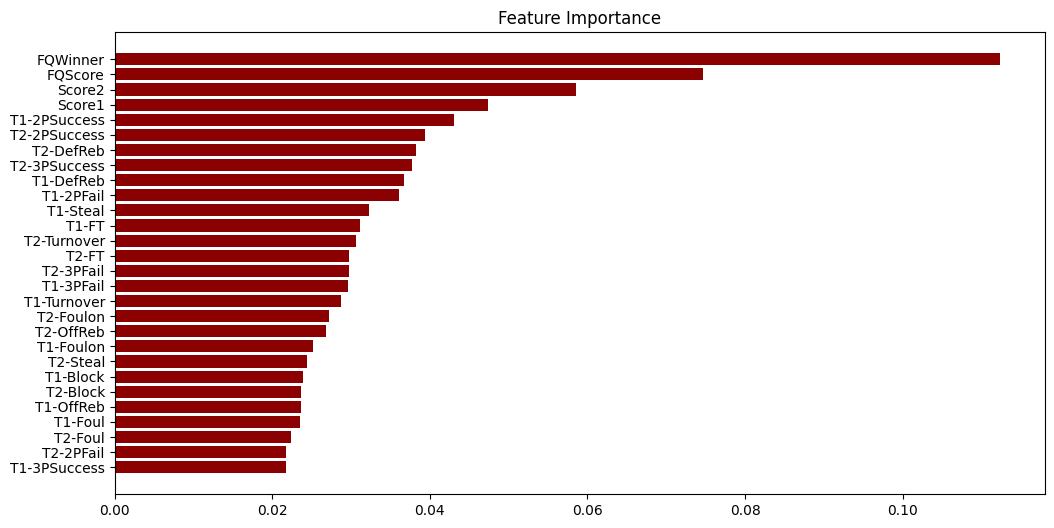

In [65]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color=['darkred'])
plt.yticks(range(len(sorted_idx)), np.array(X1_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [66]:
y_predicted = model.predict(X1_test)
ytrain_predicted = model.predict(X1_train)

In [67]:
print(metrics.classification_report(y1_test, y_predicted))
print(metrics.confusion_matrix(y1_test, y_predicted))
print(round(accuracy_score(y1_test, y_predicted),2))

print(metrics.classification_report(y1_train, ytrain_predicted))
print(metrics.confusion_matrix(y1_train, ytrain_predicted))
print(round(accuracy_score(y1_train, ytrain_predicted),2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.71      0.90      0.79       107
           2       0.82      0.64      0.72        88

    accuracy                           0.75       203
   macro avg       0.51      0.51      0.50       203
weighted avg       0.73      0.75      0.73       203

[[ 0  7  1]
 [ 0 96 11]
 [ 0 32 56]]
0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.79      0.86      0.82       255
           2       0.78      0.76      0.77       199

    accuracy                           0.79       472
   macro avg       0.52      0.54      0.53       472
weighted avg       0.76      0.79      0.77       472

[[  0  11   7]
 [  0 220  35]
 [  0  48 151]]
0.79


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [68]:
X2 = predictiondata2.drop(["fhWinner","More Three Points end of q3","More 2pt success","T1-TurnoverBC"],axis=1)
y2 = predictiondata2["More Three Points end of q3"]
X2 = X2.astype(int)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30)

In [69]:
def objective(trial):

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss'
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X2_train, y2_train)

    # Make predictions
    y_pred = optuna_model.predict(X2_test)

    # Evaluate predictions
    accuracy = accuracy_score(y2_test, y_pred)
    return accuracy

In [70]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=400)

[I 2023-01-30 21:32:30,976] A new study created in memory with name: no-name-9ce4df1b-2203-41a2-8a77-2f3c60420267
/var/folders/ld/z4r2r9jn6wg7r2ptqkzmhdy80000gn/T/ipykernel_71436/3157612958.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/var/folders/ld/z4r2r9jn6wg7r2ptqkzmhdy80000gn/T/ipykernel_71436/3157612958.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/var/folders/ld/z4r2r9jn6wg7r2ptqkzmhdy80000gn/T/ipykernel_71436/3157612958.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

In [71]:
optuna_params_xgb2 = study.best_params
optuna_params_xgb2

{'max_depth': 6,
 'learning_rate': 0.15861748573627182,
 'n_estimators': 210,
 'min_child_weight': 6,
 'gamma': 7.368751716139362e-07,
 'subsample': 0.08480778423836102,
 'colsample_bytree': 0.0910252848230612,
 'reg_alpha': 0.07284414279796941,
 'reg_lambda': 1.4785140746434594e-05}

In [72]:
model2 = XGBClassifier(**optuna_params_xgb2)
model2.fit(X2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.0910252848230612, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7.368751716139362e-07, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15861748573627182, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=210, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Text(0.5, 1.0, 'Feature Importance')

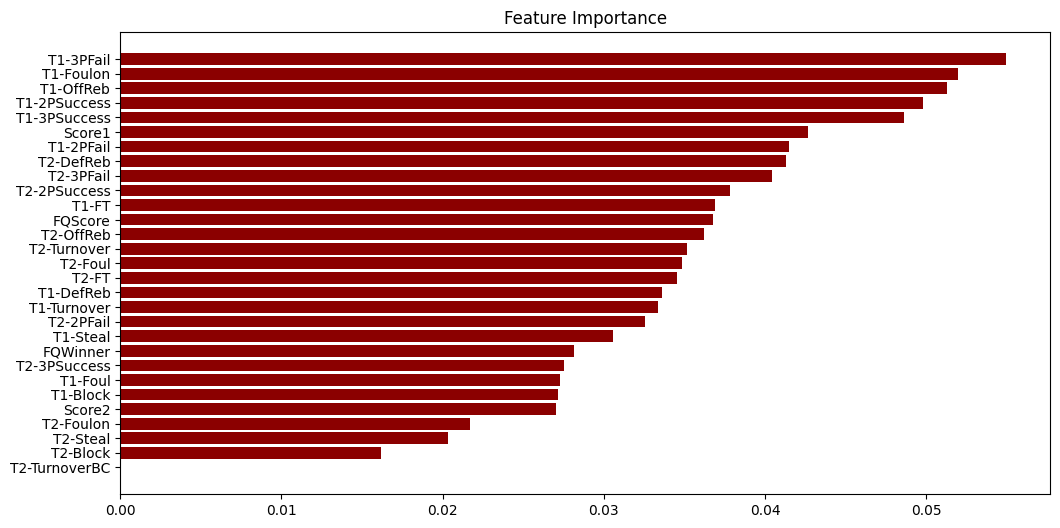

In [73]:
feature_importance2 = model2.feature_importances_
sorted_idx2 = np.argsort(feature_importance2)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx2)), feature_importance2[sorted_idx2], align='center', color=['darkred'])
plt.yticks(range(len(sorted_idx2)), np.array(X2_test.columns)[sorted_idx2])
plt.title('Feature Importance')

In [74]:
y2_predicted = model2.predict(X2_test)
y2train_predicted = model2.predict(X2_train)

In [75]:
print(metrics.classification_report(y2_test, y2_predicted))
print(metrics.confusion_matrix(y2_test, y2_predicted))
print(round(accuracy_score(y2_test, y2_predicted),2))

print(metrics.classification_report(y2_train, y2train_predicted))
print(metrics.confusion_matrix(y2_train, y2train_predicted))
print(round(accuracy_score(y2_train, y2train_predicted),2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.74      0.87      0.80       118
           2       0.70      0.62      0.66        73

    accuracy                           0.73       203
   macro avg       0.48      0.50      0.49       203
weighted avg       0.68      0.73      0.70       203

[[  0   8   4]
 [  0 103  15]
 [  0  28  45]]
0.73
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.72      0.81      0.76       247
           2       0.68      0.68      0.68       191

    accuracy                           0.70       472
   macro avg       0.47      0.50      0.48       472
weighted avg       0.65      0.70      0.67       472

[[  0  19  15]
 [  0 201  46]
 [  0  61 130]]
0.7


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [76]:
X3 = predictiondata2.drop(["fhWinner","More Three Points end of q3","More 2pt success","T1-TurnoverBC","T2-TurnoverBC"],axis=1)
y3 = predictiondata2["More 2pt success"]
X3 = X3.astype(int)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30)

In [77]:
def objective(trial):

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss'
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X3_train, y3_train)

    # Make predictions
    y_pred = optuna_model.predict(X3_test)

    # Evaluate predictions
    accuracy = accuracy_score(y3_test, y_pred)
    return accuracy

In [78]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials=400)

[I 2023-01-30 21:38:34,217] A new study created in memory with name: no-name-ce526ae9-ce9a-4db1-8d21-8b6164efaabb
/var/folders/ld/z4r2r9jn6wg7r2ptqkzmhdy80000gn/T/ipykernel_71436/572342932.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/var/folders/ld/z4r2r9jn6wg7r2ptqkzmhdy80000gn/T/ipykernel_71436/572342932.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/var/folders/ld/z4r2r9jn6wg7r2ptqkzmhdy80000gn/T/ipykernel_71436/572342932.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

In [79]:
optuna_params_xgb3 = study.best_params
optuna_params_xgb3

{'max_depth': 2,
 'learning_rate': 0.07093299823918288,
 'n_estimators': 84,
 'min_child_weight': 2,
 'gamma': 0.15926777644515022,
 'subsample': 0.5775970628217737,
 'colsample_bytree': 0.579854039863315,
 'reg_alpha': 5.3218515921375674e-05,
 'reg_lambda': 3.280209482956516e-05}

In [80]:
model3 = XGBClassifier(**optuna_params_xgb3)
model3.fit(X3_train, y3_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.579854039863315, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.15926777644515022, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.07093299823918288, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=84, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Text(0.5, 1.0, 'Feature Importance')

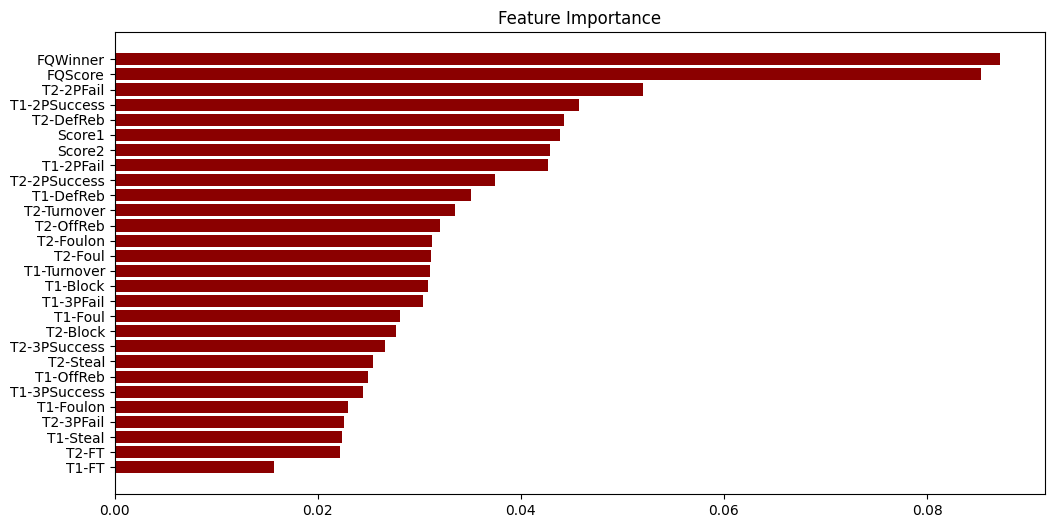

In [81]:
feature_importance3 = model3.feature_importances_
sorted_idx3 = np.argsort(feature_importance3)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx3)), feature_importance3[sorted_idx3], align='center', color=['darkred'])
plt.yticks(range(len(sorted_idx3)), np.array(X3_test.columns)[sorted_idx3])
plt.title('Feature Importance')

In [82]:


y3_predicted = model3.predict(X3_test)
y3train_predicted = model3.predict(X3_train)

In [83]:
print(metrics.classification_report(y3_test, y3_predicted))
print(metrics.confusion_matrix(y3_test, y3_predicted))
print(round(accuracy_score(y3_test, y3_predicted),2))

print(metrics.classification_report(y3_train, y3train_predicted))
print(metrics.confusion_matrix(y3_train, y3train_predicted))
print(round(accuracy_score(y3_train, y3train_predicted),2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.70      0.70      0.70       104
           2       0.67      0.67      0.67        98

    accuracy                           0.68       203
   macro avg       0.46      0.46      0.46       203
weighted avg       0.68      0.68      0.68       203

[[ 0  0  1]
 [ 0 73 31]
 [ 0 32 66]]
0.68
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.82      0.83      0.82       244
           2       0.80      0.80      0.80       223

    accuracy                           0.81       472
   macro avg       0.87      0.61      0.65       472
weighted avg       0.81      0.81      0.81       472

[[  1   1   3]
 [  0 202  42]
 [  0  44 179]]
0.81


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# Decision Tree

In [84]:
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier
from sklearn. metrics import accuracy_score
from sklearn import tree

In [85]:
predictiondata.head()

,matchId,Team1,Team2,Score1,Score2,T1-3PFail,T1-3PSuccess,T1-2PFail,T1-2PSuccess,T1-OffReb,T1-DefReb,T1-Turnover,T1-TurnoverBC,T1-Steal,T1-Block,T1-Foul,T1-Foulon,T1-FT,T2-3PFail,T2-3PSuccess,T2-2PFail,T2-2PSuccess,T2-OffReb,T2-DefReb,T2-Turnover,T2-TurnoverBC,T2-Steal,T2-Block,T2-Foul,T2-Foulon,T2-FT,fhWinner,More Three Points end of q3,More 2pt success,FQScore,FQWinner
0,947443,101345,101343,18,16,4,2,3,4,4,6,5,0,2,1,4,3,4,0,2,6,4,0,3,3,0,1,1,3,4,2,Team-1,Team-1,Team-1,2,Team-1
1,947445,101350,101353,10,8,4,0,10,5,5,8,3,0,5,1,6,2,0,4,1,5,2,3,8,7,0,0,2,2,6,4,Team-1,Team-2,Team-2,2,Team-1
2,947558,101342,101340,17,17,4,2,7,5,5,9,5,0,2,0,5,4,2,5,1,6,4,2,6,2,0,4,1,4,5,7,Team-2,Team-1,Team-2,0,Draw
3,947559,101344,101347,12,19,6,1,5,4,3,8,4,0,0,0,5,3,1,2,3,6,4,1,7,0,0,2,0,3,5,4,Draw,Team-1,Team-2,-7,Team-2
4,947560,101346,101339,13,24,5,1,9,5,3,7,3,0,1,1,3,2,0,3,1,6,9,2,10,1,0,2,1,2,3,3,Team-2,Team-2,Team-2,-11,Team-2


In [86]:
X4 = predictiondata2.drop(["fhWinner","More Three Points end of q3","More 2pt success","T1-TurnoverBC","T2-TurnoverBC"],axis=1)
y4 = predictiondata2["fhWinner"]
X4 = X4.astype(int)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30, random_state=42)

In [87]:
clf_entropy = DecisionTreeClassifier (criterion = "entropy",
random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy. fit (X4_train, y4_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [88]:
y_pred_en = clf_entropy.predict(X4_test)
y_pred_en

array([2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1])

In [89]:
print (("Accuracy is"), accuracy_score(y4_test,y_pred_en) * 100)

Accuracy is 72.41379310344827


In [90]:
X4.columns

Index(['Score1', 'Score2', 'T1-3PFail', 'T1-3PSuccess', 'T1-2PFail',
       'T1-2PSuccess', 'T1-OffReb', 'T1-DefReb', 'T1-Turnover', 'T1-Steal',
       'T1-Block', 'T1-Foul', 'T1-Foulon', 'T1-FT', 'T2-3PFail',
       'T2-3PSuccess', 'T2-2PFail', 'T2-2PSuccess', 'T2-OffReb', 'T2-DefReb',
       'T2-Turnover', 'T2-Steal', 'T2-Block', 'T2-Foul', 'T2-Foulon', 'T2-FT',
       'FQScore', 'FQWinner'],
      dtype='object')

[Text(0.4230769230769231, 0.875, 'FQScore <= 1.5\nentropy = 1.185\nsamples = 472\nvalue = [18, 255, 199]'),
 Text(0.15384615384615385, 0.625, 'FQScore <= -9.5\nentropy = 1.152\nsamples = 255\nvalue = [14, 75, 166]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 38\nvalue = [0, 0, 38]'),
 Text(0.23076923076923078, 0.375, 'FQScore <= -2.5\nentropy = 1.234\nsamples = 217\nvalue = [14, 75, 128]'),
 Text(0.15384615384615385, 0.125, 'entropy = 1.065\nsamples = 117\nvalue = [6, 28, 83]'),
 Text(0.3076923076923077, 0.125, 'entropy = 1.322\nsamples = 100\nvalue = [8, 47, 45]'),
 Text(0.6923076923076923, 0.625, 'T2-2PSuccess <= 5.5\nentropy = 0.743\nsamples = 217\nvalue = [4, 180, 33]'),
 Text(0.5384615384615384, 0.375, 'T2-Foul <= 4.5\nentropy = 0.592\nsamples = 140\nvalue = [3, 124, 13]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.8\nsamples = 80\nvalue = [3, 66, 11]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.211\nsamples = 60\nvalue = [0, 58, 2]'),
 Text(0.8461538461

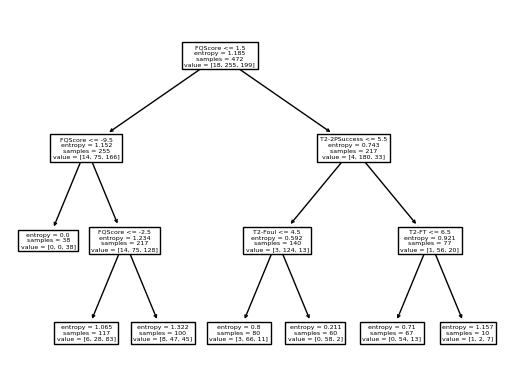

In [91]:
tree.plot_tree(clf_entropy, feature_names = X4.columns)